In [14]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv("datasets/incidents.csv")

In [16]:
df.head()

Identifier                            Title  Start date    End date  \
0  IBD031681              Food Poisoning, Imo  2025-04-18  2025-04-18   
1  IBD032064           Gunmen Kill Man, Benue  2025-03-31  2025-03-31   
2  IBD032058                Auto Crash, Lagos  2025-03-31  2025-03-31   
3  IBD032066            Stray Bullets, Sokoto  2025-03-31  2025-03-31   
4  IBD032062  Lightening Kills Herder, Kaduna  2025-03-30  2025-03-30   

   Number of deaths  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [17]:
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (7500, 5)


Identifier                            Title  Start date    End date  \
0  IBD031681              Food Poisoning, Imo  2025-04-18  2025-04-18   
1  IBD032064           Gunmen Kill Man, Benue  2025-03-31  2025-03-31   
2  IBD032058                Auto Crash, Lagos  2025-03-31  2025-03-31   
3  IBD032066            Stray Bullets, Sokoto  2025-03-31  2025-03-31   
4  IBD032062  Lightening Kills Herder, Kaduna  2025-03-30  2025-03-30   

   Number of deaths  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Identifier        7500 non-null   object
 1   Title             7500 non-null   object
 2   Start date        7500 non-null   object
 3   End date          7500 non-null   object
 4   Number of deaths  7500 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 293.1+ KB
None


In [19]:
print(df.isnull().sum())

Identifier          0
Title               0
Start date          0
End date            0
Number of deaths    0
dtype: int64


In [20]:
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['End date']   = pd.to_datetime(df['End date'], errors='coerce')


In [21]:
df['Number of deaths'] = pd.to_numeric(df['Number of deaths'], errors='coerce')


In [22]:
df = df.drop_duplicates()


In [23]:
df.rename(columns={'Title': 'Incident_Type'}, inplace=True)

In [24]:
df['States'] = df['Incident_Type'].str.split(',', n=1).str[1].str.strip()

In [25]:
df.head()

Identifier                    Incident_Type Start date   End date  \
0  IBD031681              Food Poisoning, Imo 2025-04-18 2025-04-18   
1  IBD032064           Gunmen Kill Man, Benue 2025-03-31 2025-03-31   
2  IBD032058                Auto Crash, Lagos 2025-03-31 2025-03-31   
3  IBD032066            Stray Bullets, Sokoto 2025-03-31 2025-03-31   
4  IBD032062  Lightening Kills Herder, Kaduna 2025-03-30 2025-03-30   

   Number of deaths  States  
0                 1     Imo  
1                 1   Benue  
2                 1   Lagos  
3                 1  Sokoto  
4                 1  Kaduna

In [27]:
df.head()

Identifier                    Incident_Type Start date   End date  \
0  IBD031681              Food Poisoning, Imo 2025-04-18 2025-04-18   
1  IBD032064           Gunmen Kill Man, Benue 2025-03-31 2025-03-31   
2  IBD032058                Auto Crash, Lagos 2025-03-31 2025-03-31   
3  IBD032066            Stray Bullets, Sokoto 2025-03-31 2025-03-31   
4  IBD032062  Lightening Kills Herder, Kaduna 2025-03-30 2025-03-30   

   Number of deaths  States  
0                 1     Imo  
1                 1   Benue  
2                 1   Lagos  
3                 1  Sokoto  
4                 1  Kaduna

In [28]:
df['Incident_Type'] = df['Incident_Type'].astype(str).str.split(',', n=1).str[0].str.strip()

In [29]:
df.head()

Identifier            Incident_Type Start date   End date  Number of deaths  \
0  IBD031681           Food Poisoning 2025-04-18 2025-04-18                 1   
1  IBD032064          Gunmen Kill Man 2025-03-31 2025-03-31                 1   
2  IBD032058               Auto Crash 2025-03-31 2025-03-31                 1   
3  IBD032066            Stray Bullets 2025-03-31 2025-03-31                 1   
4  IBD032062  Lightening Kills Herder 2025-03-30 2025-03-30                 1   

   States  
0     Imo  
1   Benue  
2   Lagos  
3  Sokoto  
4  Kaduna

In [30]:
df['States'] = df['States'].str.strip().str.title()
df['Incident_Type'] = df['Incident_Type'].str.strip().str.title()


In [31]:
df.head()

Identifier            Incident_Type Start date   End date  Number of deaths  \
0  IBD031681           Food Poisoning 2025-04-18 2025-04-18                 1   
1  IBD032064          Gunmen Kill Man 2025-03-31 2025-03-31                 1   
2  IBD032058               Auto Crash 2025-03-31 2025-03-31                 1   
3  IBD032066            Stray Bullets 2025-03-31 2025-03-31                 1   
4  IBD032062  Lightening Kills Herder 2025-03-30 2025-03-30                 1   

   States  
0     Imo  
1   Benue  
2   Lagos  
3  Sokoto  
4  Kaduna

In [32]:
df['States'] = df['States'].str.strip()


In [33]:
df['States'] = df['States'].str.title()


In [34]:
import re

df['States'] = df['States'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x) if pd.notnull(x) else x)
df['States'] = df['States'].str.replace(r'\s+', ' ', regex=True)  


In [35]:
state_corrections = {
    # Lagos State
    'Lagos': 'Lagos State',
    'Lagos St': 'Lagos State',
    'Lagos State.': 'Lagos State',
    'LagosSt': 'Lagos State',

    # Federal Capital Territory / Abuja
    'Fct': 'FCT',
    'F.C.T': 'FCT',
    'F C T': 'FCT',
    'Federal Capital Territory': 'FCT',
    'Abuja': 'FCT',
    '(Abuja)': 'FCT',
    'Fct (Abuja)': 'FCT',
    'Capital Territory': 'FCT',

    # Rivers State
    'Rivers': 'Rivers State',
    'River State': 'Rivers State',

    # Zamfara State
    'Zamafara': 'Zamfara State',
    'Zamfara State.': 'Zamfara State',
    'Zamafara': 'Zamfara State',

    # Cross River State
    'Cross RIvers': 'Cross River State',
    'Cross-River': 'Cross River State',
    'Cross River': 'Cross River State',

    # Borno State
    'Borno State.': 'Borno State',
    'Bornon': 'Borno State',

    # Anambra State
    'Anambra State.': 'Anambra State',

    # Kano State
    'Kano': 'Kano State',
    'Kano State.':'Kano State',

    # Kaduna State
    'Kaduna State.': 'Kaduna State',

    # Enugu State
    'Enugu State.': 'Enugu State',

    # Osun State
    'Osun': 'Osun State',
    'OsunState': 'Osun State',

    # Ogun State
    'Ogun State.': 'Ogun State',
    'Dies Ogun':'Ogun State',

    # Oyo State
    'Oyo': 'Oyo State',
    'Oyo State.': 'Oyo State',

    # Delta State
    'Delta State.': 'Delta State',

    
    'Kwara': 'Kwara State',
    'Kwara State.': 'Kwara State',

    # Bayelsa State
    'Bayelsa': 'Bayelsa State',
    'Bayelsa State.': 'Bayelsa State',

    # Imo State
    'Imo': 'Imo State',
    'Imo State.': 'Imo State',

    
    'Adamawa.': 'Adamawa State',
    'Akwa Ibom.': 'Akwa Ibom State',
    'Anambra.': 'Anambra State',
    'Bauchi State.': 'Bauchi State',
    'Benue': 'Benue State',
    'Benue State.': 'Benue State',

    'Jigaawa': 'Jigawa',
    'Ondo Ondo': 'Ondo',
    'Bayelsa Offshore': 'Bayelsa',
    
    
}


In [36]:
df = df[df['States'].notna() & (df['States'] != '') & (df['States'].str.lower() != 'unknown')]


In [37]:
df

Identifier               Incident_Type Start date   End date  \
0     IBD031681              Food Poisoning 2025-04-18 2025-04-18   
1     IBD032064             Gunmen Kill Man 2025-03-31 2025-03-31   
2     IBD032058                  Auto Crash 2025-03-31 2025-03-31   
3     IBD032066               Stray Bullets 2025-03-31 2025-03-31   
4     IBD032062     Lightening Kills Herder 2025-03-30 2025-03-30   
...         ...                         ...        ...        ...   
7495  IBD024354                  Auto Crash 2022-06-18 2022-06-18   
7496  IBD024357                 Boat Mishap 2022-06-18 2022-06-18   
7497  IBD024385  Fulani Herdsmen And Youths 2022-06-18 2022-06-18   
7498  IBD024352          Mob Vs Phone Thief 2022-06-18 2022-06-18   
7499  IBD024344             Herdsmen Attack 2022-06-17 2022-06-17   

      Number of deaths   States  
0                    1      Imo  
1                    1    Benue  
2                    1    Lagos  
3                    1   Sokoto  
4                    1   Kaduna  
...                ...      ...  
7495                18    Niger  
7496                 7  Bayelsa  
7497                 3     Abia  
7498                 1  Bayelsa  
7499                 2    Benue  

[7465 rows x 6 columns]

In [38]:
print(df["States"].unique())


['Imo' 'Benue' 'Lagos' 'Sokoto' 'Kaduna' 'Katsina' 'Plateau' 'Abia'
 'Delta' 'Ogun' 'Gombe' 'Kogi' 'Fct Abuja' 'Ondo' 'Rivers Offshore' 'Kano'
 'Kebbi' 'Edo' 'Ekiti' 'Cross River' 'Rivers' 'Anambra' 'Borno' 'Enugu'
 'Bauchi' 'Osun' 'Zamfara' 'Adamawa' 'Yobe' 'Ebonyi' 'Kwara' 'Jigawa'
 'Nasarawa' 'Akwa Ibom' 'Niger' 'Bayelsa' 'Oyo' 'Zamafara' 'Taraba'
 'Cross Rivers' 'Son Anambra' 'Dies Ogun'
 'Vigilantes Vs Herders Fct Abuja' 'Jigiwa' 'Fct' 'Jiagawa' 'Abuja'
 'River' 'Katisna' 'Anmabra' 'Uyo' 'Kadun' 'Bonny' 'Bayelsa Offshore'
 'Worshipper Delta' 'Nasaraawa' 'Akwa Ibom Offshore' 'Kadauna' 'Katsina '
 'Ondo Ondo' 'Abuja Fct' 'Hamza Musa' 'Nasarwa' 'Bornon' 'Niger State'
 'Jigaawa' 'Port Harcourt' 'FctAbuja']


In [39]:
print(df.head())
print(df.info())


  Identifier            Incident_Type Start date   End date  Number of deaths  \
0  IBD031681           Food Poisoning 2025-04-18 2025-04-18                 1   
1  IBD032064          Gunmen Kill Man 2025-03-31 2025-03-31                 1   
2  IBD032058               Auto Crash 2025-03-31 2025-03-31                 1   
3  IBD032066            Stray Bullets 2025-03-31 2025-03-31                 1   
4  IBD032062  Lightening Kills Herder 2025-03-30 2025-03-30                 1   

   States  
0     Imo  
1   Benue  
2   Lagos  
3  Sokoto  
4  Kaduna  
<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Identifier        7465 non-null   object        
 1   Incident_Type     7465 non-null   object        
 2   Start date        7464 non-null   datetime64[ns]
 3   End date          7464 non-null   datetime64[ns]
 4   Number of d

In [40]:
df.loc[:, "Incident_Type"] = df["Incident_Type"].str.strip()
df.loc[:, "States"] = df["States"].str.strip()


In [41]:
# 1. Remove rows with missing dates
df = df.dropna(subset=["Start date", "End date"])

# 2. Strip spaces in text columns
df["Incident_Type"] = df["Incident_Type"].str.strip()
df["States"] = df["States"].str.strip()

# 3. Reset index
df = df.reset_index(drop=True)

# 4. Confirm
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Identifier        7464 non-null   object        
 1   Incident_Type     7464 non-null   object        
 2   Start date        7464 non-null   datetime64[ns]
 3   End date          7464 non-null   datetime64[ns]
 4   Number of deaths  7464 non-null   int64         
 5   States            7464 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 350.0+ KB
None


C:\Users\hp\AppData\Local\Temp\ipykernel_16264\1135645651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Incident_Type"] = df["Incident_Type"].str.strip()
C:\Users\hp\AppData\Local\Temp\ipykernel_16264\1135645651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["States"] = df["States"].str.strip()


In [42]:
# Total number of incidents
total_incidents = df.shape[0]

# Total number of deaths
total_deaths = df["Number of deaths"].sum()

# Average deaths per incident
avg_deaths_per_incident = df["Number of deaths"].mean()

# Incident type counts
incident_type_counts = df["Incident_Type"].value_counts()

# State counts
state_counts = df["States"].value_counts()

# Display results
print(f"Total Incidents: {total_incidents}")
print(f"Total Deaths: {total_deaths}")
print(f"Average Deaths per Incident: {avg_deaths_per_incident:.2f}")
print("\nTop Incident Types:")
print(incident_type_counts.head(10))
print("\nTop States by Incident Count:")
print(state_counts.head(10))


Total Incidents: 7464
Total Deaths: 35193
Average Deaths per Incident: 4.72

Top Incident Types:
Incident_Type
Auto Crash              1027
Banditry                 288
Gunmen Attack            220
Domestic Violence        161
Flooding                 114
Army Vs Bandits          114
Cult Killing             113
Cult Clash               102
Police Vs Kidnappers     102
Herdsmen Attack           99
Name: count, dtype: int64

Top States by Incident Count:
States
Lagos        624
Ogun         483
Kaduna       461
Delta        348
Benue        327
Niger        325
Borno        314
Fct Abuja    301
Anambra      280
Plateau      268
Name: count, dtype: int64


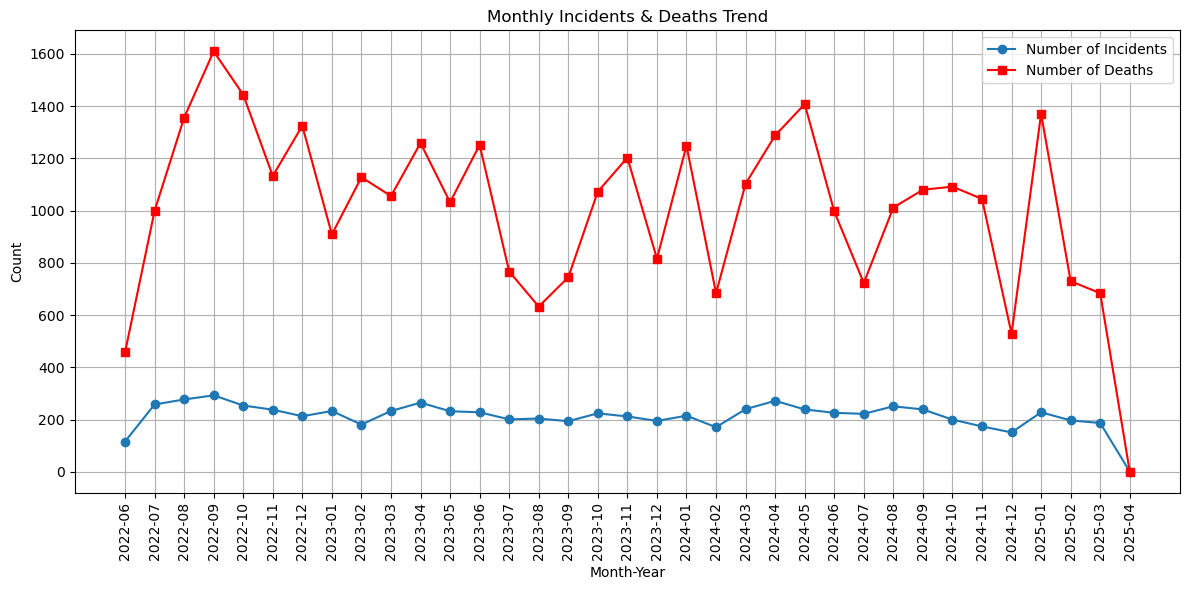

In [43]:
import matplotlib.pyplot as plt

# Group incidents by month/year
df['YearMonth'] = df['Start date'].dt.to_period('M')

# Count incidents per month
monthly_incidents = df.groupby('YearMonth').size()

# Sum deaths per month
monthly_deaths = df.groupby('YearMonth')["Number of deaths"].sum()

# Plot incidents over time
plt.figure(figsize=(12,6))
plt.plot(monthly_incidents.index.astype(str), monthly_incidents.values, marker='o', label='Number of Incidents')
plt.plot(monthly_deaths.index.astype(str), monthly_deaths.values, marker='s', label='Number of Deaths', color='red')
plt.xticks(rotation=90)
plt.title("Monthly Incidents & Deaths Trend")
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16264\3926524776.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Deaths", y="State", data=state_summary, palette="Reds_r")


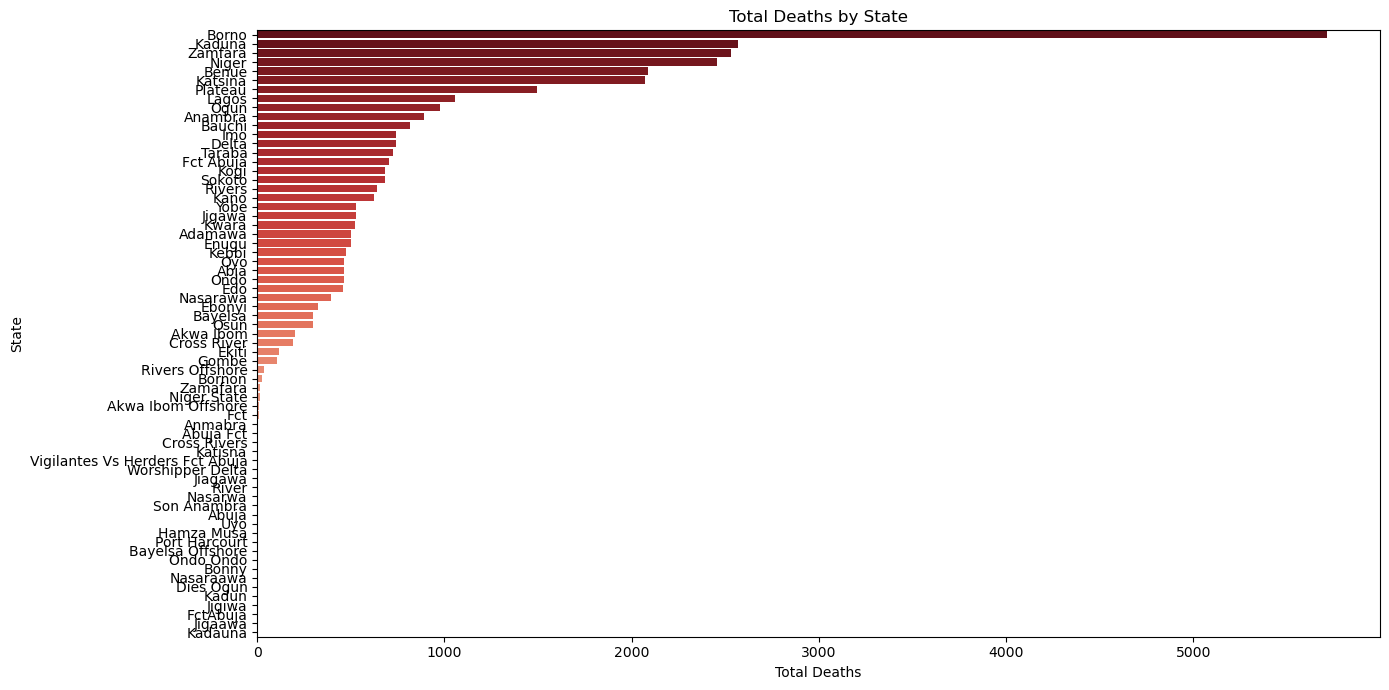

In [44]:
import seaborn as sns

# Group by state
state_summary = df.groupby("States").agg({
    "Identifier": "count",  # Number of incidents
    "Number of deaths": "sum"  # Total deaths
}).reset_index()

# Rename columns
state_summary.columns = ["State", "Number of Incidents", "Total Deaths"]

# Sort by total deaths (highest first)
state_summary = state_summary.sort_values(by="Total Deaths", ascending=False)

# Bar chart
plt.figure(figsize=(14,7))
sns.barplot(x="Total Deaths", y="State", data=state_summary, palette="Reds_r")
plt.title("Total Deaths by State")
plt.xlabel("Total Deaths")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [45]:
df["Year"] = df["Start date"].dt.year
df["Month"] = df["Start date"].dt.month
df["Month_Name"] = df["Start date"].dt.strftime("%B")


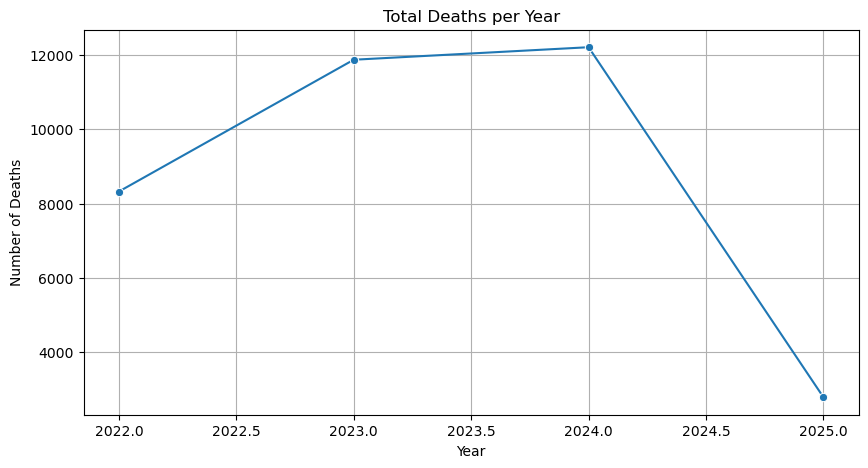

In [46]:
yearly_trend = df.groupby("Year")["Number of deaths"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Number of deaths", data=yearly_trend, marker="o")
plt.title("Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16264\1255048183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month_Name", y="Number of deaths", data=monthly_trend, palette="Blues_d")


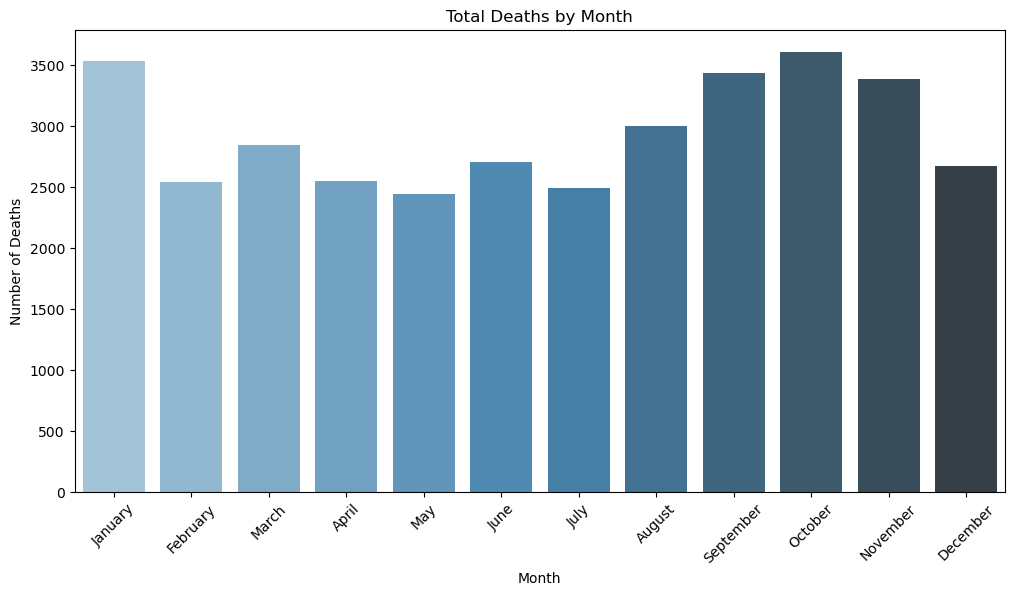

In [47]:
monthly_trend = df.groupby("Month_Name")["Number of deaths"].sum().reset_index()

# To keep months in order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_trend["Month_Name"] = pd.Categorical(monthly_trend["Month_Name"], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values("Month_Name")

plt.figure(figsize=(12,6))
sns.barplot(x="Month_Name", y="Number of deaths", data=monthly_trend, palette="Blues_d")
plt.title("Total Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()


In [48]:
incident_counts = df["Incident_Type"].value_counts().reset_index()
incident_counts.columns = ["Incident_Type", "Incident_Count"]

plt.figure(figsize=(14, max(6, len(incident_counts)*0.4)))  # auto-adjust height
sns.barplot(
    x="Incident_Count", 
    y="Incident_Type", 
    data=incident_counts,
    palette="Set2",    # brighter palette
    order=incident_counts.sort_values("Incident_Count", ascending=False)["Incident_Type"]
)
plt.title("Number of Incidents by Type", fontsize=16)
plt.xlabel("Incident Count")
plt.ylabel("Incident Type")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16264\1280119725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [49]:
# Research questions

# 1. Total fatalities by state
state_deaths = df.groupby("States")["Number of deaths"].sum().reset_index()
state_deaths = state_deaths.sort_values(by="Number of deaths", ascending=False)

print(state_deaths)

# 2. Total incidents by state
state_incidents = df["States"].value_counts().reset_index()
state_incidents.columns = ["States", "Incident_Count"]

print(state_incidents)


      States  Number of deaths
13     Borno              5712
35    Kaduna              2567
66   Zamfara              2531
46     Niger              2454
11     Benue              2089
..       ...               ...
34     Kadun                 1
32    Jigiwa                 1
25  FctAbuja                 1
30   Jigaawa                 1
33   Kadauna                 1

[67 rows x 2 columns]
         States  Incident_Count
0         Lagos             624
1          Ogun             483
2        Kaduna             461
3         Delta             348
4         Benue             327
..          ...             ...
62      Katisna               1
63        River               1
64  Son Anambra               1
65    Dies Ogun               1
66     FctAbuja               1

[67 rows x 2 columns]


In [53]:
#3.Most common incident type overall
most_common_incident = df["Incident_Type"].value_counts().reset_index()
most_common_incident.columns = ["Incident_Type", "Count"]
most_common_incident


Incident_Type  Count
0                        Auto Crash   1027
1                          Banditry    288
2                     Gunmen Attack    220
3                 Domestic Violence    161
4                          Flooding    114
...                             ...    ...
2235               Soldier Vs Lover      1
2236                 Girl Strangled      1
2237  Vigilante Operative Kills Man      1
2238        Bandit Vs Pdp Secretary      1
2239     Fulani Herdsmen And Youths      1

[2240 rows x 2 columns]

In [54]:
# 4. Most common incident type overall
df["Month"] = df["Start date"].dt.month
incidents_per_month = df["Month"].value_counts().reset_index()
incidents_per_month.columns = ["Month", "Incident_Count"]
incidents_per_month


Month  Incident_Count
0       8             732
1       9             726
2       7             681
3      10             678
4       1             676
5       3             660
6      11             624
7       6             570
8      12             559
9       2             549
10      4             538
11      5             471

In [55]:
# 5.Average fatalities per incident type
avg_fatalities_per_type = df.groupby("Incident_Type")["Number of deaths"].mean().reset_index().sort_values(by="Number of deaths", ascending=False)
avg_fatalities_per_type


Incident_Type  Number of deaths
988                     Heat Waves             210.0
1608       Petrol Tanker Explosion             186.0
47            Army Bombs Villagers             127.0
812                 Gunmen Kill 12              83.0
1137           Iswap Fighers Drown              82.0
...                            ...               ...
977        Gunmen Vs Ward Chairman               1.0
975             Gunmen Vs Villager               1.0
967          Gunmen Vs Transporter               1.0
966   Gunmen Vs Traffic Controller               1.0
2239        Youths Vs Village Head               1.0

[2240 rows x 2 columns]

In [56]:
# 6.State with highest average fatalities per incident
avg_fatalities_per_state = df.groupby("States")["Number of deaths"].mean().reset_index().sort_values(by="Number of deaths", ascending=False)
avg_fatalities_per_state


States  Number of deaths
14       Bornon         26.000000
13        Borno         18.191083
47  Niger State         14.000000
66      Zamfara         12.406863
38      Katsina          9.136564
..          ...               ...
1         Abuja          1.000000
32       Jigiwa          1.000000
30      Jigaawa          1.000000
27   Hamza Musa          1.000000
33      Kadauna          1.000000

[67 rows x 2 columns]

In [57]:
# 7.Total incidents per year
df["Year"] = df["Start date"].dt.year
incidents_per_year = df["Year"].value_counts().reset_index()
incidents_per_year.columns = ["Year", "Incident_Count"]
incidents_per_year.sort_values(by="Year", inplace=True)
incidents_per_year


Year  Incident_Count
2  2022            1649
0  2023            2602
1  2024            2600
3  2025             613

In [58]:
# 8. Longest-lasting incidents (by days)
df["Duration_days"] = (df["End date"] - df["Start date"]).dt.days
longest_incidents = df.sort_values(by="Duration_days", ascending=False)[["Identifier", "Incident_Type", "States", "Duration_days"]]
longest_incidents.head(10)


Identifier   Incident_Type   States  Duration_days
3921  IBD030670   Police Vs Man   Rivers            352
3211  IBD031249      Auto Crash  Anambra            304
3195  IBD030587  Flood Disaster   Bauchi            240
3199  IBD030596  Flood Disaster   Sokoto            240
3203  IBD030600  Flood Disaster    Kadun            240
3204  IBD030591  Flood Disaster    Borno            240
3205  IBD030593  Flood Disaster  Bayelsa            240
3206  IBD030598  Flood Disaster   Ebonyi            240
3207  IBD030592  Flood Disaster   Jigawa            240
3208  IBD030589  Flood Disaster   Taraba            240

In [59]:
# 9.State with most incidents in the most recent year
latest_year = df["Year"].max()
recent_year_data = df[df["Year"] == latest_year]
state_most_incidents_recent = recent_year_data["States"].value_counts().reset_index()
state_most_incidents_recent.columns = ["States", "Incident_Count"]
state_most_incidents_recent


States  Incident_Count
0              Ogun              49
1             Lagos              45
2         Fct Abuja              42
3             Delta              34
4             Niger              27
5           Katsina              25
6             Borno              25
7               Edo              23
8             Benue              22
9           Anambra              21
10             Ondo              21
11           Rivers              20
12          Zamfara              19
13           Kaduna              18
14              Imo              17
15          Plateau              15
16             Abia              15
17        Akwa Ibom              12
18             Kogi              12
19             Kano              11
20              Oyo              11
21           Sokoto              11
22            Kebbi              11
23           Bauchi              11
24             Osun              11
25            Kwara              10
26             Yobe               9
27           Ebonyi               8
28          Bayelsa               8
29            Enugu               7
30           Jigawa               7
31         Nasarawa               7
32            Ekiti               7
33          Adamawa               5
34            Gombe               4
35      Cross River               4
36           Taraba               4
37  Rivers Offshore               1
38         Zamafara               1
39     Cross Rivers               1
40      Son Anambra               1
41        Dies Ogun               1

In [60]:
# 10.Incident type with highest total fatalities
fatalities_by_incident_type = df.groupby("Incident_Type")["Number of deaths"].sum().reset_index().sort_values(by="Number of deaths", ascending=False)
fatalities_by_incident_type


Incident_Type  Number of deaths
219               Auto Crash              4523
251                 Banditry              2842
803            Gunmen Attack              1197
60        Army Vs Boko Haram              1197
58           Army Vs Bandits               988
...                      ...               ...
1009       Herders Vs Youths                 1
1004     Herders Vs Employer                 1
1001     Herders Kill Farmer                 1
996        Herder Vs Sibling                 1
2239  Youths Vs Village Head                 1

[2240 rows x 2 columns]

In [61]:
df.to_csv("cleaned_incidents.csv", index=False)


In [62]:
import os
os.getcwd()


'C:\\Users\\hp\\python class\\datasets'

In [64]:
df.columns


Index(['Identifier', 'Incident_Type', 'Start date', 'End date',
       'Number of deaths', 'States', 'YearMonth', 'Year', 'Month',
       'Month_Name', 'Duration_days'],
      dtype='object')

In [65]:
import pandas as pd

# Define correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Ensure Month_Name column is ordered
df["Month_Name"] = pd.Categorical(df["Month_Name"], categories=month_order, ordered=True)

# Sort dataset by month and year (optional but keeps data neat)
df = df.sort_values(["Year", "Month_Name"])

# Save cleaned dataset
df.to_csv("cleaned_incidents.csv", index=False)

print("✅ Cleaned dataset saved as 'cleaned_incidents.csv'")


✅ Cleaned dataset saved as 'cleaned_incidents.csv'
